# Dimensionality Reduction

In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Untangling the Swiss Roll

In [2]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000,noise=0.2)

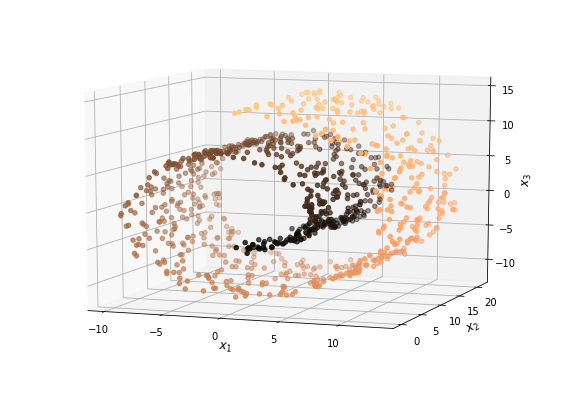

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap="copper")
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=12)
ax.set_ylabel("$x_2$", fontsize=12)
ax.set_zlabel("$x_3$", fontsize=12)
plt.show()

### Principal Component Analysis

Finding hyperplanes upon which to project the data such that the variance remains large, but the number of dimensions can be reduced.

Text(0.5, 1.0, 'Sigmoid Kernel')

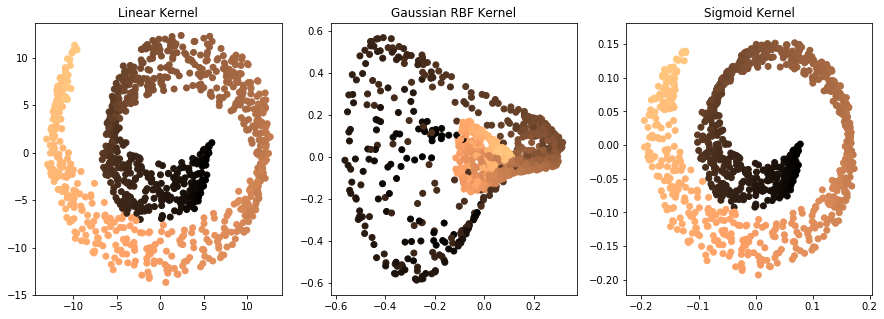

In [29]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=.045, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=.0005, coef0=1, fit_inverse_transform=True)

X_2d_lin = lin_pca.fit_transform(X)
X_2d_rbf = rbf_pca.fit_transform(X)
X_2d_sig = sig_pca.fit_transform(X)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X_2d_lin[:,0], X_2d_lin[:,1], c=t, cmap="copper")
plt.title("Linear Kernel")

plt.subplot(132)
plt.scatter(X_2d_rbf[:,0], X_2d_rbf[:,1], c=t, cmap="copper")
plt.title("Gaussian RBF Kernel")

plt.subplot(133)
plt.scatter(X_2d_sig[:,0], X_2d_sig[:,1], c=t, cmap="copper")
plt.title("Sigmoid Kernel")

### Locally Linear Embedding (LLE)
Measures the distance between a training instance and it's closest neighbors and then looks for a low-dimensional representation to preserve that distance.

In [36]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_2d_lle = lle.fit_transform(X)

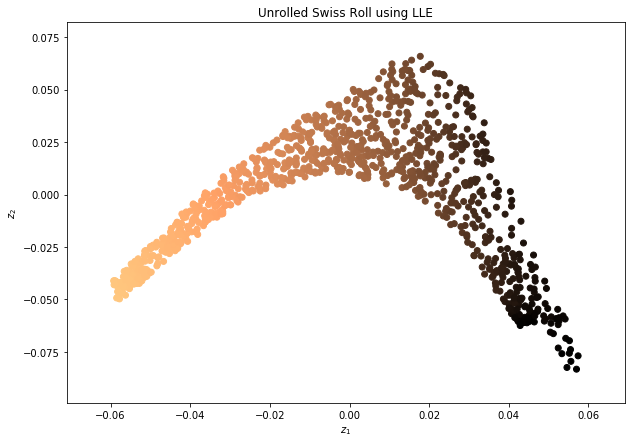

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(X_2d_lle[:,0], X_2d_lle[:,1], c=t, cmap="copper")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.title("Unrolled Swiss Roll using LLE")
plt.show()

### Multidimensional Scaling (MDS)
Also attempts to preserve the distances between instances while reducing the dimensionality, but does this for all instances, which makes it very slow.

In [38]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_2d_mds = mds.fit_transform(X)

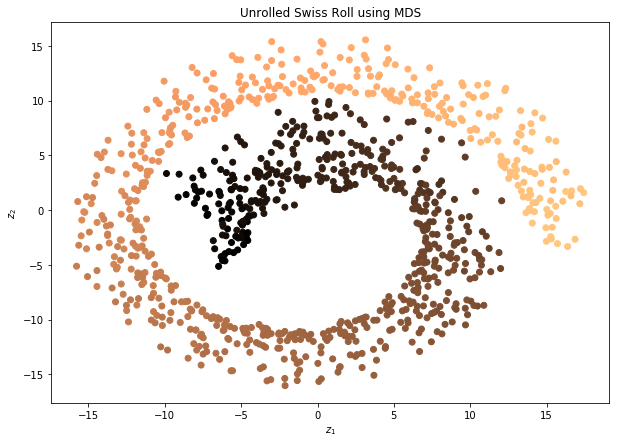

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(X_2d_mds[:,0], X_2d_mds[:,1], c=t, cmap="copper")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.title("Unrolled Swiss Roll using MDS")
plt.show()

### Isomap
Creates a graph connecting all instances and then reduces the dimensionality while trying to preserve the geodesic distance between the instances

In [40]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_2d_iso = isomap.fit_transform(X)

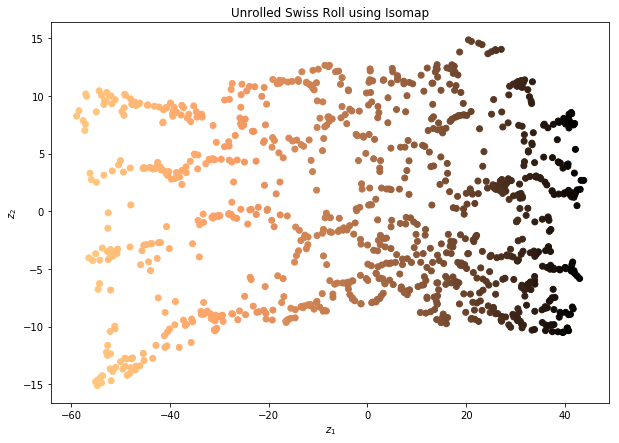

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(X_2d_iso[:,0], X_2d_iso[:,1], c=t, cmap="copper")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.title("Unrolled Swiss Roll using Isomap")
plt.show()

### t-Distributed Stochastic Neighbor Embedding (t-SNE)
Reduces dimensionality by keeping similar instances close and dissimilar instances apart.  Particularly useful in visualizing clusters of instances in high-dimensional space.

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_2d_tsne = tsne.fit_transform(X)

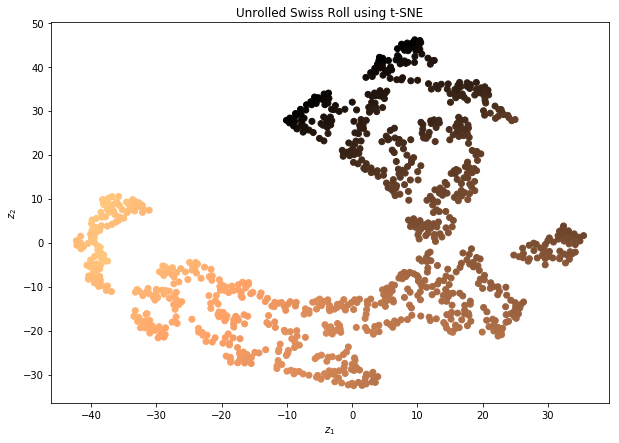

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(X_2d_tsne[:,0], X_2d_tsne[:,1], c=t, cmap="copper")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.title("Unrolled Swiss Roll using t-SNE")
plt.show()

## Dimensionality Reduction on MNIST

In [49]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X = mnist["data"]
y = mnist["target"]

In [50]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [58]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

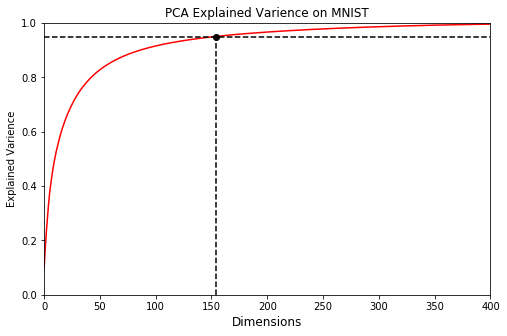

In [75]:
plt.figure(figsize=(8,5))
plt.plot(cumsum, "r-")
plt.xlabel("Dimensions", fontsize=12)
plt.ylabel("Explained Varience")
plt.title("PCA Explained Varience on MNIST")
d = np.argmax(cumsum >= .95) + 1
plt.plot([0,400],[.95,.95],"k--")
plt.plot([d,d],[0,.95],"k--")
plt.plot(d,.95,"ko")
axes = [0,400,0,1]
plt.axis(axes)
plt.show()

Can reduce MNIST data to about 150 dimensions without losing more than 5% of the variance

In [54]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100)

In [55]:
%time rnd_clf.fit(X_train, y_train)

CPU times: user 48.2 s, sys: 527 ms, total: 48.8 s
Wall time: 50.1 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9697

In [59]:
pca = PCA(n_components=0.95)
X_train_2d_pca = pca.fit_transform(X_train)

In [63]:
%time rnd_clf.fit(X_train_2d_pca, y_train)

CPU times: user 1min 54s, sys: 913 ms, total: 1min 55s
Wall time: 2min


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
X_test_2d_pca = pca.transform(X_test)

y_pred = rnd_clf.predict(X_test_2d_pca)
accuracy_score(y_test, y_pred)

0.9492

Even though we reduced the dimensionality from 784 to 151, the Random Forest classifier took twice as long and got a worse accuracy!  Obviously, PCA did not help.  Let's see if PCA will help softmax regression instead:

In [71]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500)
%time log_clf.fit(X_train, y_train)

CPU times: user 2min 48s, sys: 2.31 s, total: 2min 50s
Wall time: 1min 33s


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9217

In [73]:
%time log_clf.fit(X_train_2d_pca, y_train)

CPU times: user 51.2 s, sys: 1.56 s, total: 52.7 s
Wall time: 27 s


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
y_pred = log_clf.predict(X_test_2d_pca)
accuracy_score(y_test, y_pred)

0.9236

In this case, we actually see the dimensionality reduction drastically speeds up training time with similar performance on the test set!

### Using dimensionality reduction to visualize MNIST data

only going to process on a random subset of 5,000 images

In [76]:
m = 5000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [114]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13,10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10.,10.]])
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y==digit, 0], X_normalized[y==digit, 1], cmap=cmap(int(digit) / 9))
    plt.axis("off")
    ax = plt.gcf().gca() #get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors,[image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                        color=cmap(int(y[index]) / 9), fontdict={'weight': "bold", "size": 14})
            else:
                image = images[index].reshape(28,28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [92]:
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

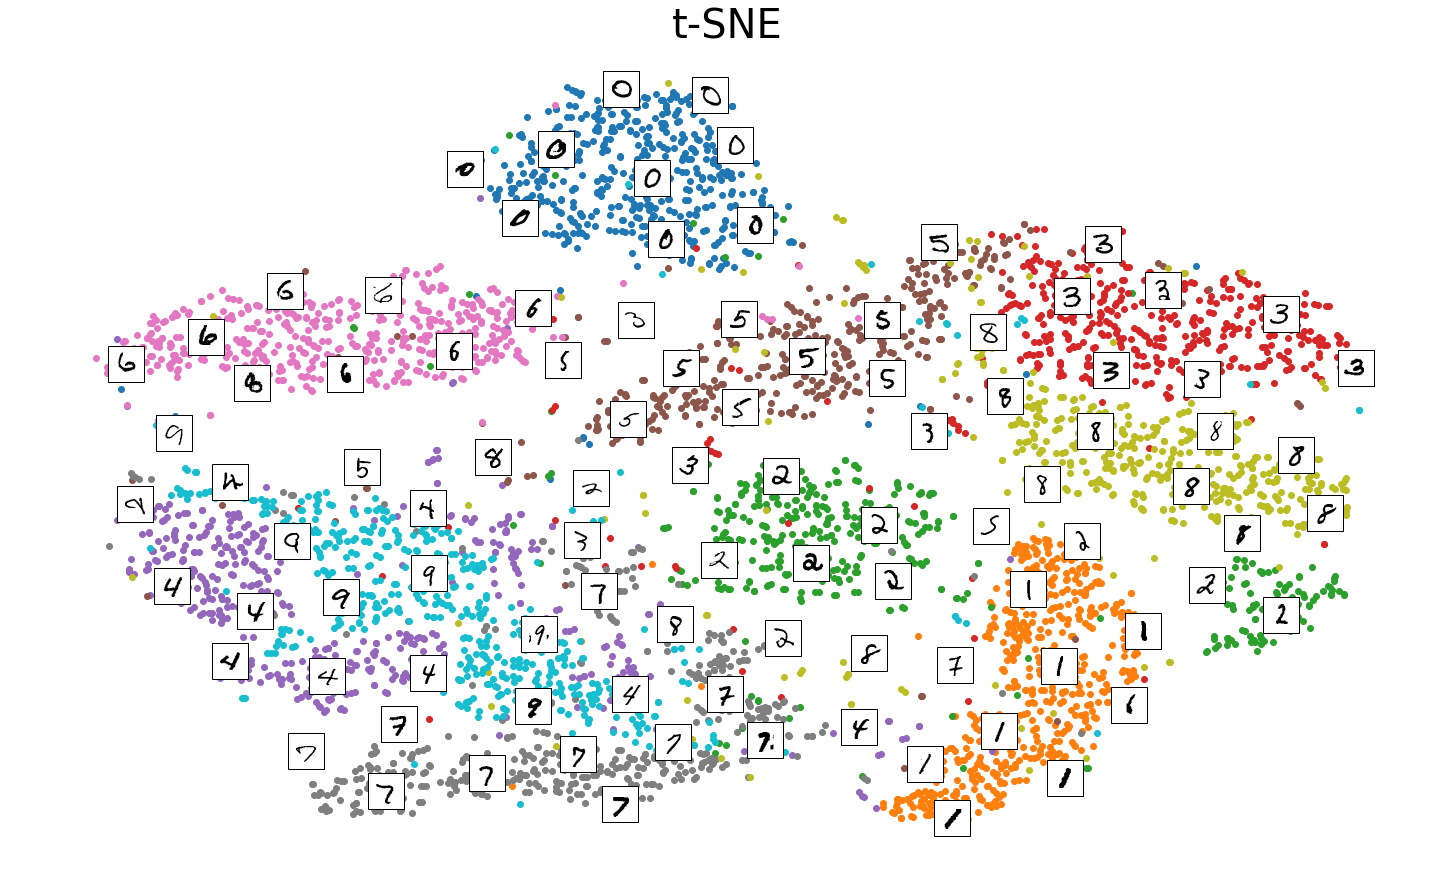

In [119]:
plot_digits(X_reduced, y, images=X, min_distance=0.07, figsize=(25,15))
plt.title("t-SNE", fontsize=40)
plt.show()

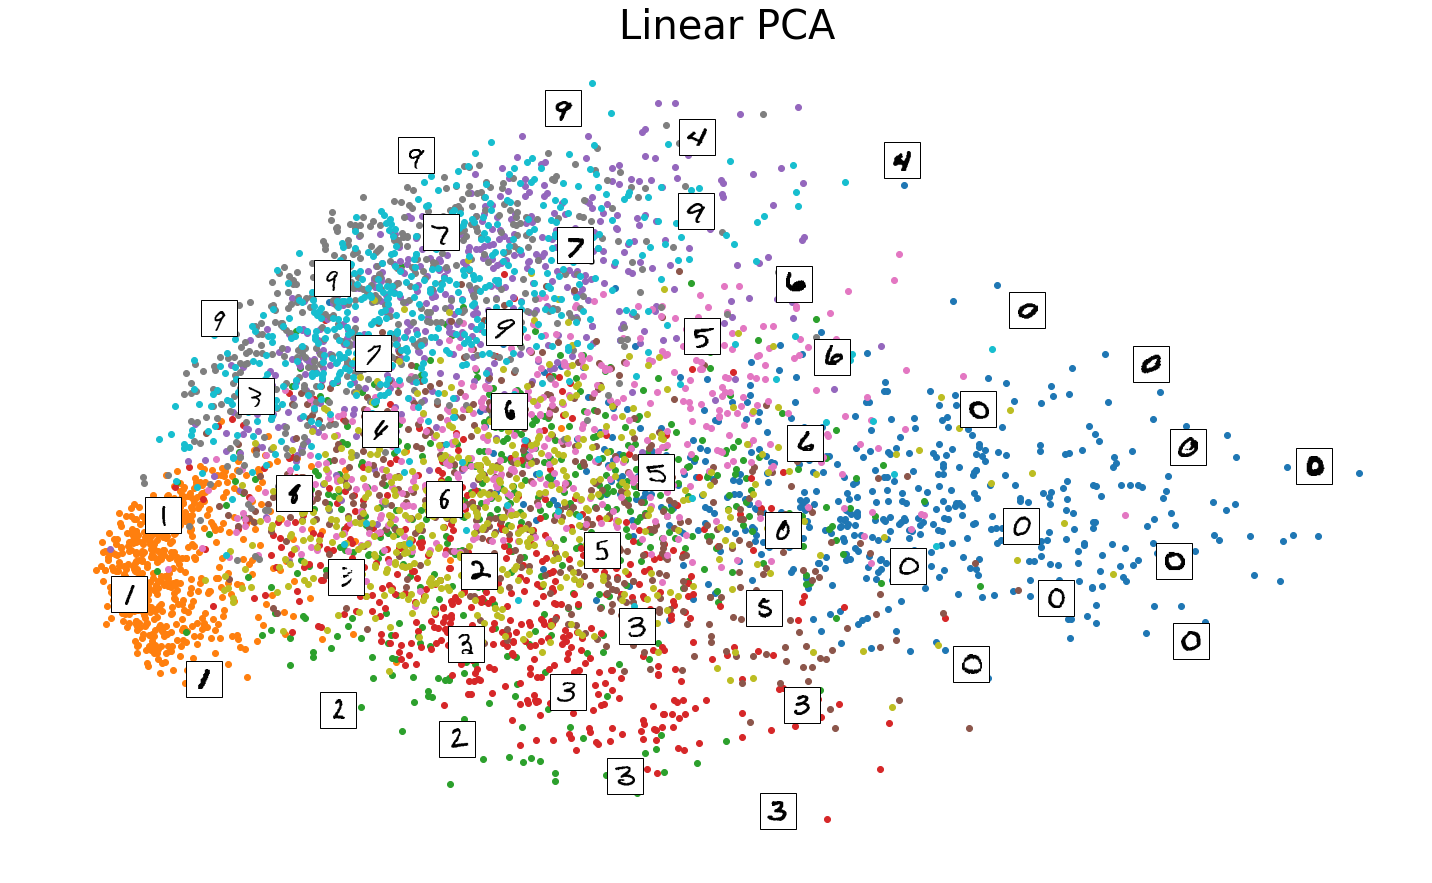

In [123]:
X_reduced_pca = PCA(n_components=2).fit_transform(X)
plot_digits(X_reduced_pca, y, images=X, min_distance=0.1, figsize=(25,15))
plt.title("Linear PCA", fontsize=40)
plt.show()

### Linear Discriminant Analysis (LDA)
A classification algorithm that learns discriminative axes between the classes during training that can be used to reduce the dimensionality of the data. Keeps different classes separate, and is often a good dimensionality reduction technique to use before running another classifier.

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_reduced_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X,y)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


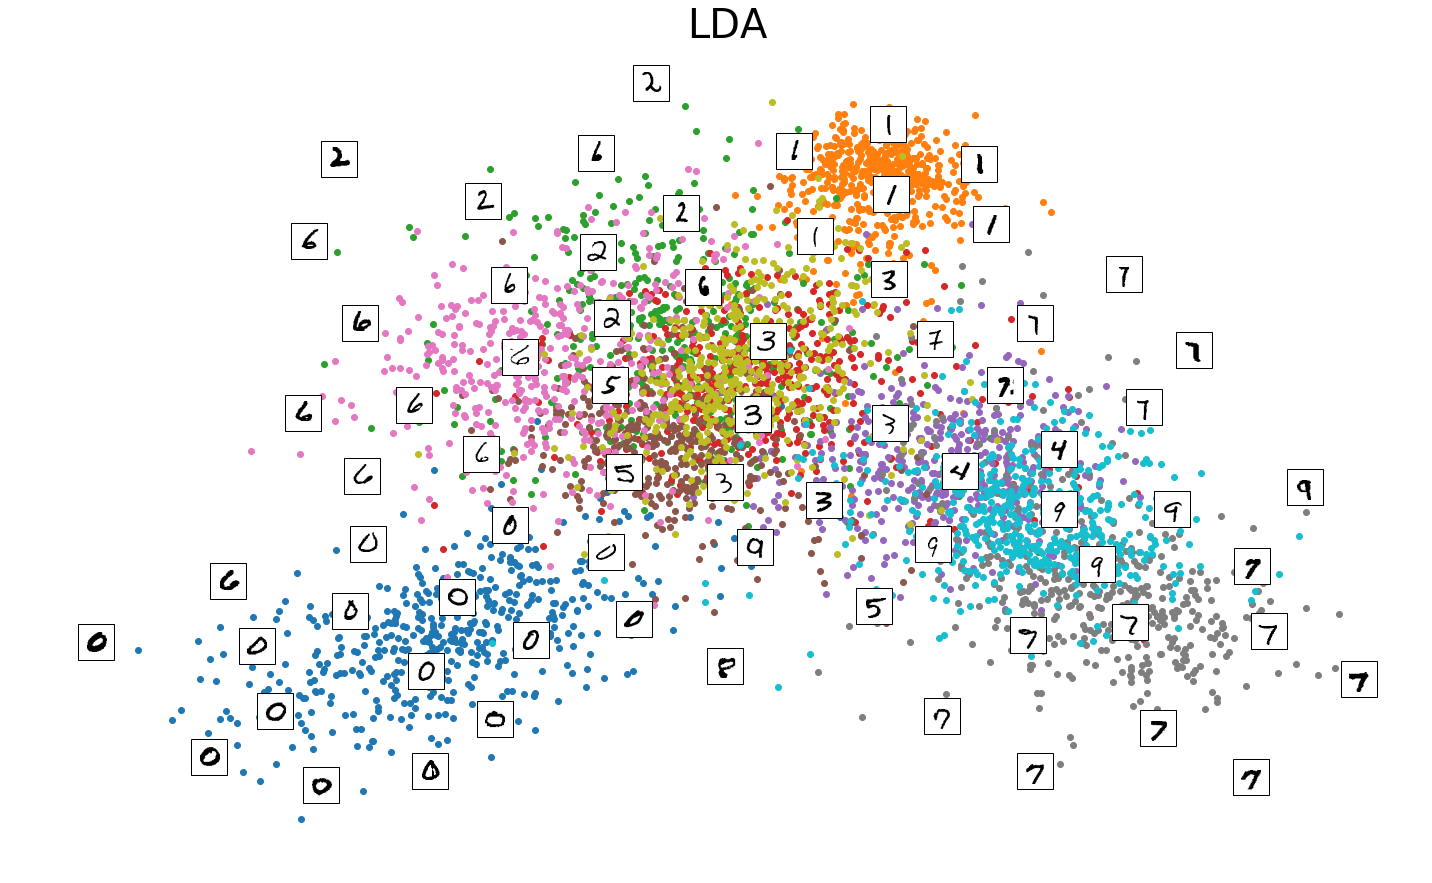

In [125]:
plot_digits(X_reduced_lda, y, images=X, figsize=(25,15), min_distance=0.08)
plt.title("LDA", fontsize=40)
plt.show()

## What Did We Accomplish?

1. Explored a few popular Dimensionality Reduction techniques including PCA, LLE, MDS, t-SNE, and LDA.
2. Visualized how each of these perform dimensionality reduction on the Swiss Roll data
3. Applied PCA dimensionality reduction to MNIST data before classification algorithms. Surprisingly, the random forest algorithm took longer to train and had worse performance on the compressed dataset.  However, softmax regression saw significant improvements in training time with similar accuracy.
4. Used dimensionality reduction to display MNIST data in a 2d environment. t-SNE was especially impressive when visualizing the different MNIST clusters.